## Ideas

- Rectangle class as in SPG
- DS to keep track of 
    - Height of interval in strip
    - Length of interval
- Should query for leftmost lowest interval of size greater than rectangle width. 
- After query we should update the intervals - which intervals should be updated? 
    - Naive method: Recompute all intervals after each insertion.

In [4]:
import bisect
import matplotlib.pyplot as plt

In [5]:
class Rectangle: 
    def __init__(self, width, height):
        self.height, self.width = height, width

    def rotate(self):
        self.height, self.width = (self.width, self.height) if self.height < self.width else (self.height, self.width)
        
    def get_dimensions(self):
        return self.height, self.width
    
    def get_area(self):
        return self.height * self.width
    
    def __str__(self):
        return f"Rectangle({self.width}, {self.height})"
    
    def __repr__(self):
        return self.__str__()

In [6]:
# Array of rectangles (or strip bottom) reachable from above.
# Each element contains y-value of top of rectangle and the rectangle itself.
beachline = [] # ((x-value of left side, x-value of right side, top y-value), rectangle)
intervals = [] # (start, stop, length) should keep sorted by the start.
intervals_start = [] # [x[0] for x in intervals]

In [48]:
def recompute_intervals():
    # While the flat level is not filled and can still be filled - then fill the bottom. 
    ints = []
    ints_start = [x[0] for x in intervals]
    for i, ((xl1, xr1, y1), r1) in enumerate(beachline):
        j, k   = i+1, i-1 # right pointer, # left pointer 
        strip_boundary = False
        # Expand from current rectangle on beachline.
        sl = 0
        sr = 0
        for q, ((xl0, xr0, y0), r0) in enumerate(beachline):
            if q < i and y0 >= y1:
                sl += r0.width
            if q > i and y0 >= y1:
                sr += r0.width
        if sl >= xl1:
            k = -float("inf")
        if sr >= 1-xr1:
            j = float("inf")
        while j <= len(beachline)-1 or k >= 0:
            if j <= len(beachline)-1:
                (xl2,xr2, y2), r2 = beachline[j] # right rect
                if y2 >= y1:                
                    idx = bisect.bisect_left(ints_start, xl1)
                    ints.insert(j, (min(xr1, xl2), max(xr1, xl2), abs(xl2 - xr1)))
                    j = float("inf") # no need to look more here
            if k >= 0:
                (xl3,xr3, y3), r3 = beachline[k] # left rect
                if y3 >= y1:
                    idx = bisect.bisect_left(ints_start, xr1)
                    ints.insert(k, (min(xr3, xl1), max(xr3, xl1), abs(xl1 - xr3)))
                    k = -float("inf") # no need to look more here
            if j < len(beachline):
                j += 1
            if k > -1:
                k -= 1
        if j == len(beachline):
            idx = bisect.bisect_left(ints_start, xl1)
            ints.append((xr1, 1, abs(1 - xr1)))
        if k == -1:
            idx = bisect.bisect_left(ints_start, xr1)
            ints.insert(0, (0, xl1, abs(xl1 - 0)))

    return [x for x in ints if x[2] != 0]
                
                
                    
        
# Finds viable spot for rectangle and updates the beachline.
def find_position(rectangle):
    rectangle.rotate()
    beach_start = [x[0][0] for x in beachline]
    x_left  = 0
    x_right = 0 
    for start, stop, length in intervals:
        if length >= rectangle.width:
            x_left = start
            x_right = start + rectangle.width
            
    # if no interval is viable place on top of all currently placed rectangles left-justified
    if x_left == 0 and x_right == 0:
        x_left = 0
        x_right = rectangle.width
        max_y = max(beachline, key=lambda x: x[0][2])[0][2]
    else: 
        max_y = 0
    to_pop = []
    for i, ((x1, x2, y), r) in enumerate(beachline):
        if x1 >= x_left and x2 <= x_right:
            to_pop.append(i)
            max_y = max(max_y, y)
        if x1 > x_left or x2 > x_right:
            max_y = max(max_y, y)

    offset = 0
    for i in to_pop:
        beachline.pop(i-offset)
        
        
    # TODO: Replace with binary search
    idx = bisect.bisect_left(beach_start, x_left)
    beachline.insert(idx, ((x_left, x_right, max_y + rectangle.height), rectangle))
    for_plotting.append(((x_left, max_y), rectangle))
    
    return 

In [49]:
beachline = [((0, 0.2, 0.5), Rectangle(0.2, 0.5))] 
intervals = [(0.2, 1.0, 0.8)] #(start, stop, length) should keep sorted by the start.
for_plotting = [((0,0), Rectangle(0.2, 0.5))]

In [50]:
import random

In [56]:
for _ in range(10):
    find_position(Rectangle(random.uniform(0.01, 0.5), random.uniform(0.01, 0.5)))
    intervals = recompute_intervals()

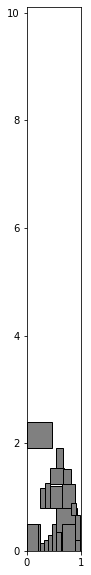

In [57]:
fig = plt.figure(figsize=(2, max(10, 10)))
ax = fig.add_subplot(111)
ax.set_xlim([0, 1])
ax.set_ylim([0, 10+0.1/1])
ax.set_aspect('equal')
cur_y = 0

for (x,y), rectangle in for_plotting:
    ax.add_patch(plt.Rectangle((x, y),
                               rectangle.width,
                               rectangle.height,
                               linestyle="-",
                               ec = "black",
                               fc = "grey"))

In [53]:
beachline, intervals

([((0, 0.2, 0.5), Rectangle(0.2, 0.5)),
  ((0.2, 0.24474516797920448, 0.49289123502897514),
   Rectangle(0.044745167979204456, 0.49289123502897514)),
  ((0.24474516797920448, 0.3348757991398968, 1.1644128007240764),
   Rectangle(0.09013063116069231, 0.3676695180227828)),
  ((0.3256610611314541, 0.394292178358723, 0.20229361939514515),
   Rectangle(0.06863111722726886, 0.20229361939514515)),
  ((0.3348757991398968, 0.4329378723397166, 1.2542255947699172),
   Rectangle(0.09806207319981981, 0.45748231206862383)),
  ((0.394292178358723, 0.4700201636166765, 0.2862335604592466),
   Rectangle(0.07572798525795348, 0.2862335604592466)),
  ((0.4329378723397166, 0.6591550078202414, 1.2073273513149079),
   Rectangle(0.22621713548052483, 0.41058406861361435)),
  ((0.5451593626583674, 0.9273196346296502, 0.7967432827012935),
   Rectangle(0.38216027197128283, 0.4498767889389181))],
 [(0, 0.3348757991398968, 0.3348757991398968),
  (0, 0.24474516797920448, 0.24474516797920448),
  (0.2, 0.24474516797920